In [270]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join

In [271]:
pd.set_option("display.max_columns", None)
sns.set(style= "whitegrid")

## load data

In [272]:
path = r'../Downloads/Data_Extract_From_World_Development_Indicators'

In [273]:
df_test = pd.read_csv('WDI_Data.csv')

In [274]:
df_test.shape

(2665, 22)

In [275]:
print(f"Initial shape: {df_test.shape}")
df_test.head()

Initial shape: (2665, 22)


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],2014 [YR2014],2013 [YR2013],2005 [YR2005],2004 [YR2004],2003 [YR2003],2002 [YR2002],2001 [YR2001],2000 [YR2000]
0,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,13679.6264980954,12699.9623137756,14532.5009308511,11752.7998922979,9955.97478680428,8535.59938004389,10738.0179223384,13935.6811110049,14187.4827252965,13858.2039802008,12233.1444119186,12963.675773326,5067.65342293276,4242.02099089422,3320.47775133903,2569.69963519124,7141.47507662826,7637.01489203628
1,Argentina,ARG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,76.6,76.105,76.543,76.77,76.847,75.878,73.948,75.806,77.395,..,76.268,75.829,75.231,74.871,74.307,74.312,74.154,73.91
3,Argentina,ARG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,11.7,11.4,11,10.7,10.5,10.3,10,9.8,9.6,..,12.2,12.7,16.7,17.3,17.8,18.3,18.8,19.4
4,Argentina,ARG,"School enrollment, tertiary (% gross)",SE.TER.ENRR,83.762580871582,86.6178817749023,89.2329406738281,90.9728317260742,95.0775527954102,99.266227722168,107.130661010742,107.047912597656,..,..,81.1694107055664,78.7686614990234,63.732349395752,64.8878479003906,64.4024505615234,62.0592613220215,58.791690826416,54.3332710266113


## inspect columns and missing data

In [276]:
print("Columns:/n", df_test.columns.tolist())
print("/nMisisng values per column:/n",df_test.isna().sum())

Columns:/n ['Country Name', 'Country Code', 'Series Name', 'Series Code', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]', '2014 [YR2014]', '2013 [YR2013]', '2005 [YR2005]', '2004 [YR2004]', '2003 [YR2003]', '2002 [YR2002]', '2001 [YR2001]', '2000 [YR2000]']
/nMisisng values per column:/n Country Name     3
Country Code     5
Series Name      5
Series Code      5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
2024 [YR2024]    5
2014 [YR2014]    5
2013 [YR2013]    5
2005 [YR2005]    5
2004 [YR2004]    5
2003 [YR2003]    5
2002 [YR2002]    5
2001 [YR2001]    5
2000 [YR2000]    5
dtype: int64


## drop rows with missing values

In [277]:
df_test = df_test.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])
print(f"Shape after dropping core missing values rows: {df_test.shape}")

Shape after dropping core missing values rows: (2660, 22)


## reshape long format 

In [278]:
# identify all year columns

year_cols = [col for col in df_test.columns if "[YR" in col]

In [279]:
id_vars = ["Country Name", "Country Code", "Series Name", "Series Code"]

df_long = pd.melt(df_test, 
                  id_vars=id_vars, 
                  var_name="Year", 
                  value_name="Value")


In [280]:
df_long.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year',
       'Value'],
      dtype='object')

In [281]:
df_test.head

<bound method NDFrame.head of      Country Name Country Code  \
0       Argentina          ARG   
1       Argentina          ARG   
2       Argentina          ARG   
3       Argentina          ARG   
4       Argentina          ARG   
...           ...          ...   
2655        World          WLD   
2656        World          WLD   
2657        World          WLD   
2658        World          WLD   
2659        World          WLD   

                                            Series Name           Series Code  \
0                          GDP per capita (current US$)        NY.GDP.PCAP.CD   
1                 Inflation, consumer prices (annual %)        FP.CPI.TOTL.ZG   
2               Life expectancy at birth, total (years)        SP.DYN.LE00.IN   
3       Mortality rate, under-5 (per 1,000 live births)           SH.DYN.MORT   
4                 School enrollment, tertiary (% gross)           SE.TER.ENRR   
...                                                 ...                   .

In [304]:
df_long['Year'] = df_long['Year'].astype(str).str.extract(r'(\d{4})').astype(int)

In [283]:
df_long.head(25)

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,2015,13679.6264980954
1,Argentina,ARG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2015,..
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2015,76.6
3,Argentina,ARG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,2015,11.7
4,Argentina,ARG,"School enrollment, tertiary (% gross)",SE.TER.ENRR,2015,83.762580871582
5,Argentina,ARG,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2015,107.549072265625
6,Argentina,ARG,Individuals using the Internet (% of population),IT.NET.USER.ZS,2015,68
7,Argentina,ARG,Population growth (annual %),SP.POP.GROW,2015,1.04725888735726
8,Argentina,ARG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,2015,9.4
9,Argentina,ARG,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,2015,4.51393025813273


In [284]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47880 entries, 0 to 47879
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  47880 non-null  object
 1   Country Code  47880 non-null  object
 2   Series Name   47880 non-null  object
 3   Series Code   47880 non-null  object
 4   Year          47880 non-null  int64 
 5   Value         47880 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.2+ MB


In [306]:
indicators = [
    "GDP per capita (current US$)",
    "Life expectancy at birth, total (years)",
    "Individuals using the Internet (% of population)"
]

df_filtered = df_long[df_long['Series Name'].isin(indicators)]

# Check the filtered data
df_filtered.head()


,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,2015,13679.6264980954
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2015,76.6
6,Argentina,ARG,Individuals using the Internet (% of population),IT.NET.USER.ZS,2015,68
10,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,2015,56739.0265346593
12,Australia,AUS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2015,82.4


## back to wide for analysis

In [286]:
# Convert Value to numeric, coerce errors to NaN
df_filtered['Value'] = pd.to_numeric(df_filtered['Value'], errors='coerce')

# Check the column type
print(df_filtered['Value'].dtype)
print(df_filtered['Value'].isna().sum())


float64
1894


/var/folders/c3/vmr1w1q937z6kp6c42j805100000gn/T/ipykernel_18263/155684016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Value'] = pd.to_numeric(df_filtered['Value'], errors='coerce')


In [287]:
df_wide = df_filtered.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Optional: remove column grouping from pivot
df_wide.columns.name = None

df_wide.head(25)


,Country Name,Country Code,Year,GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,2000,174.930991,NaN,55.005000
1,Afghanistan,AFG,2001,138.706822,0.00472,55.511000
2,Afghanistan,AFG,2002,178.954088,0.00456,56.225000
3,Afghanistan,AFG,2003,198.871116,0.08790,57.171000
4,Afghanistan,AFG,2004,221.763654,0.10600,57.810000
5,Afghanistan,AFG,2005,254.184249,1.22000,58.247000
6,Afghanistan,AFG,2013,637.087099,5.90000,62.188000
7,Afghanistan,AFG,2014,625.054942,7.00000,62.260000
8,Afghanistan,AFG,2015,565.569730,8.26000,62.270000
9,Afghanistan,AFG,2016,522.082216,11.00000,62.646000


In [288]:
df_wide.columns

Index(['Country Name', 'Country Code', 'Year', 'GDP per capita (current US$)',
       'Individuals using the Internet (% of population)',
       'Life expectancy at birth, total (years)'],
      dtype='object')

In [289]:
df_wide[df_wide['Country Name'] == 'Argentina']


,Country Name,Country Code,Year,GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)"
178,Argentina,ARG,2000,7637.014892,7.04,73.910
179,Argentina,ARG,2001,7141.475077,9.78,74.154
180,Argentina,ARG,2002,2569.699635,10.90,74.312
181,Argentina,ARG,2003,3320.477751,11.90,74.307
182,Argentina,ARG,2004,4242.020991,16.00,74.871
183,Argentina,ARG,2005,5067.653423,17.70,75.231
184,Argentina,ARG,2013,12963.675773,59.90,75.829
185,Argentina,ARG,2014,12233.144412,64.70,76.268
186,Argentina,ARG,2015,13679.626498,68.00,76.600
187,Argentina,ARG,2016,12699.962314,71.00,76.105


In [290]:
df_wide.groupby('Year')['GDP per capita (current US$)'].mean()


Year
2000     7559.368984
2001     7567.728262
2002     8170.958810
2003     9391.372891
2004    10677.801156
2005    11572.810252
2013    16990.719309
2014    17316.221723
2015    15670.560495
2016    15792.971763
2017    16602.199014
2018    17601.854739
2019    17495.993711
2020    16256.251705
2021    18770.675340
2022    19421.955696
2023    19856.122867
2024    18079.659452
Name: GDP per capita (current US$), dtype: float64

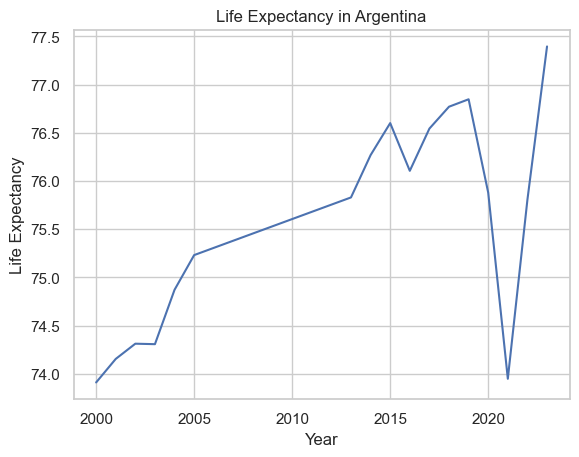

In [307]:
arg = df_wide[df_wide['Country Name'] == 'Argentina']
plt.plot(arg['Year'], arg['Life expectancy at birth, total (years)'])
plt.title("Life Expectancy in Argentina")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()


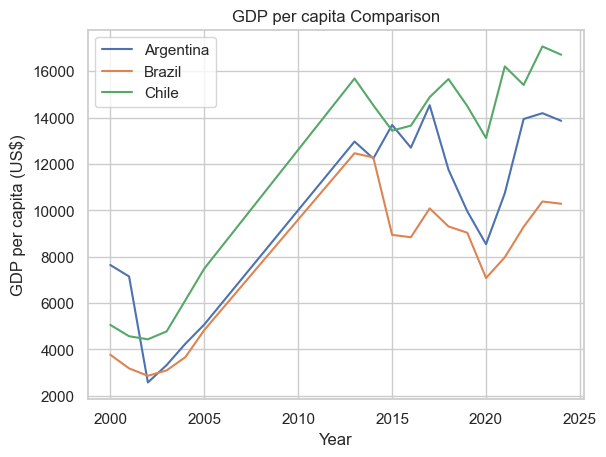

In [293]:
# Example: Compare multiple countries
countries = ['Argentina', 'Brazil', 'Chile',]
df_plot = df_wide[df_wide['Country Name'].isin(countries)]
for c in countries:
    plt.plot(df_plot[df_plot['Country Name'] == c]['Year'],
             df_plot[df_plot['Country Name'] == c]['GDP per capita (current US$)'],
             label=c)
plt.legend()
plt.title("GDP per capita Comparison")
plt.xlabel("Year")
plt.ylabel("GDP per capita (US$)")
plt.show()


In [311]:
# GDP per capita growth
df_wide['GDP_growth'] = df_wide.groupby('Country Name')['GDP per capita (current US$)'].pct_change() * 100

# Life Expectancy change
df_wide['LE_change'] = df_wide.groupby('Country Name')['Life expectancy at birth, total (years)'].diff()

# Internet usage growth
df_wide['Internet_growth'] = df_wide.groupby('Country Name')['Individuals using the Internet (% of population)'].pct_change() * 100


/var/folders/c3/vmr1w1q937z6kp6c42j805100000gn/T/ipykernel_18263/4156804629.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_wide['GDP_growth'] = df_wide.groupby('Country Name')['GDP per capita (current US$)'].pct_change() * 100
/var/folders/c3/vmr1w1q937z6kp6c42j805100000gn/T/ipykernel_18263/4156804629.py:8: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_wide['Internet_growth'] = df_wide.groupby('Country Name')['Individuals using the Internet (% of population)'].pct_change() * 100


## Correlation per country

In [295]:
# Example for Argentina
country = 'Argentina'
df_country = df_wide[df_wide['Country Name'] == country][
    ['GDP_growth', 'LE_change', 'Internet_growth']
]

# Compute correlation matrix
corr_matrix = df_country.corr()
print(f"Correlation matrix for {country}:\n", corr_matrix)


Correlation matrix for Argentina:
                  GDP_growth  LE_change  Internet_growth
GDP_growth         1.000000   0.153315         0.833037
LE_change          0.153315   1.000000         0.121425
Internet_growth    0.833037   0.121425         1.000000


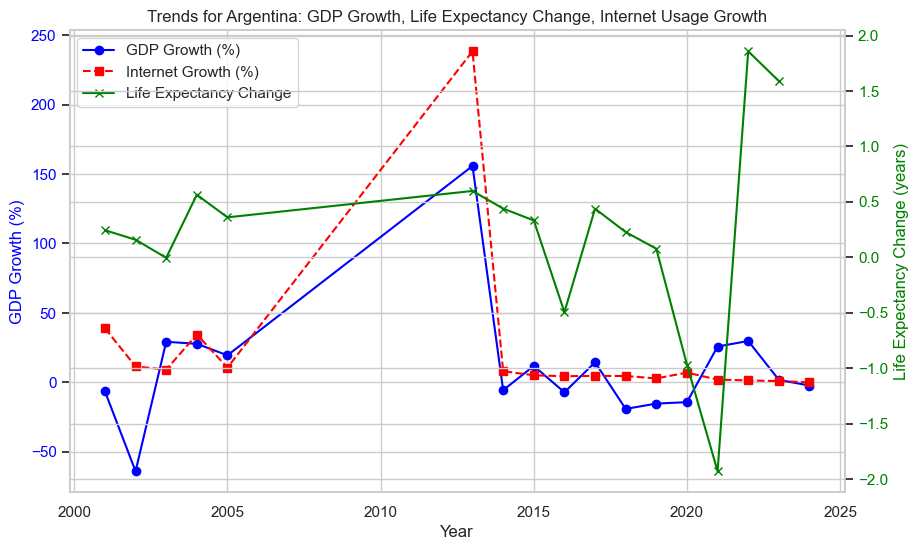

In [296]:
# Filter for a single country
country = 'Argentina'
df_country = df_wide[df_wide['Country Name'] == country]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# GDP growth (left axis)
ax1.plot(df_country['Year'], df_country['GDP_growth'], color='blue', marker='o', label='GDP Growth (%)')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Growth (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Life Expectancy change (right axis)
ax2 = ax1.twinx()
ax2.plot(df_country['Year'], df_country['LE_change'], color='green', marker='x', label='Life Expectancy Change')
ax2.set_ylabel('Life Expectancy Change (years)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Internet usage growth (left axis, dashed line)
ax1.plot(df_country['Year'], df_country['Internet_growth'], color='red', linestyle='--', marker='s', label='Internet Growth (%)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title(f"Trends for {country}: GDP Growth, Life Expectancy Change, Internet Usage Growth")
plt.show()


## Scatter plots per country

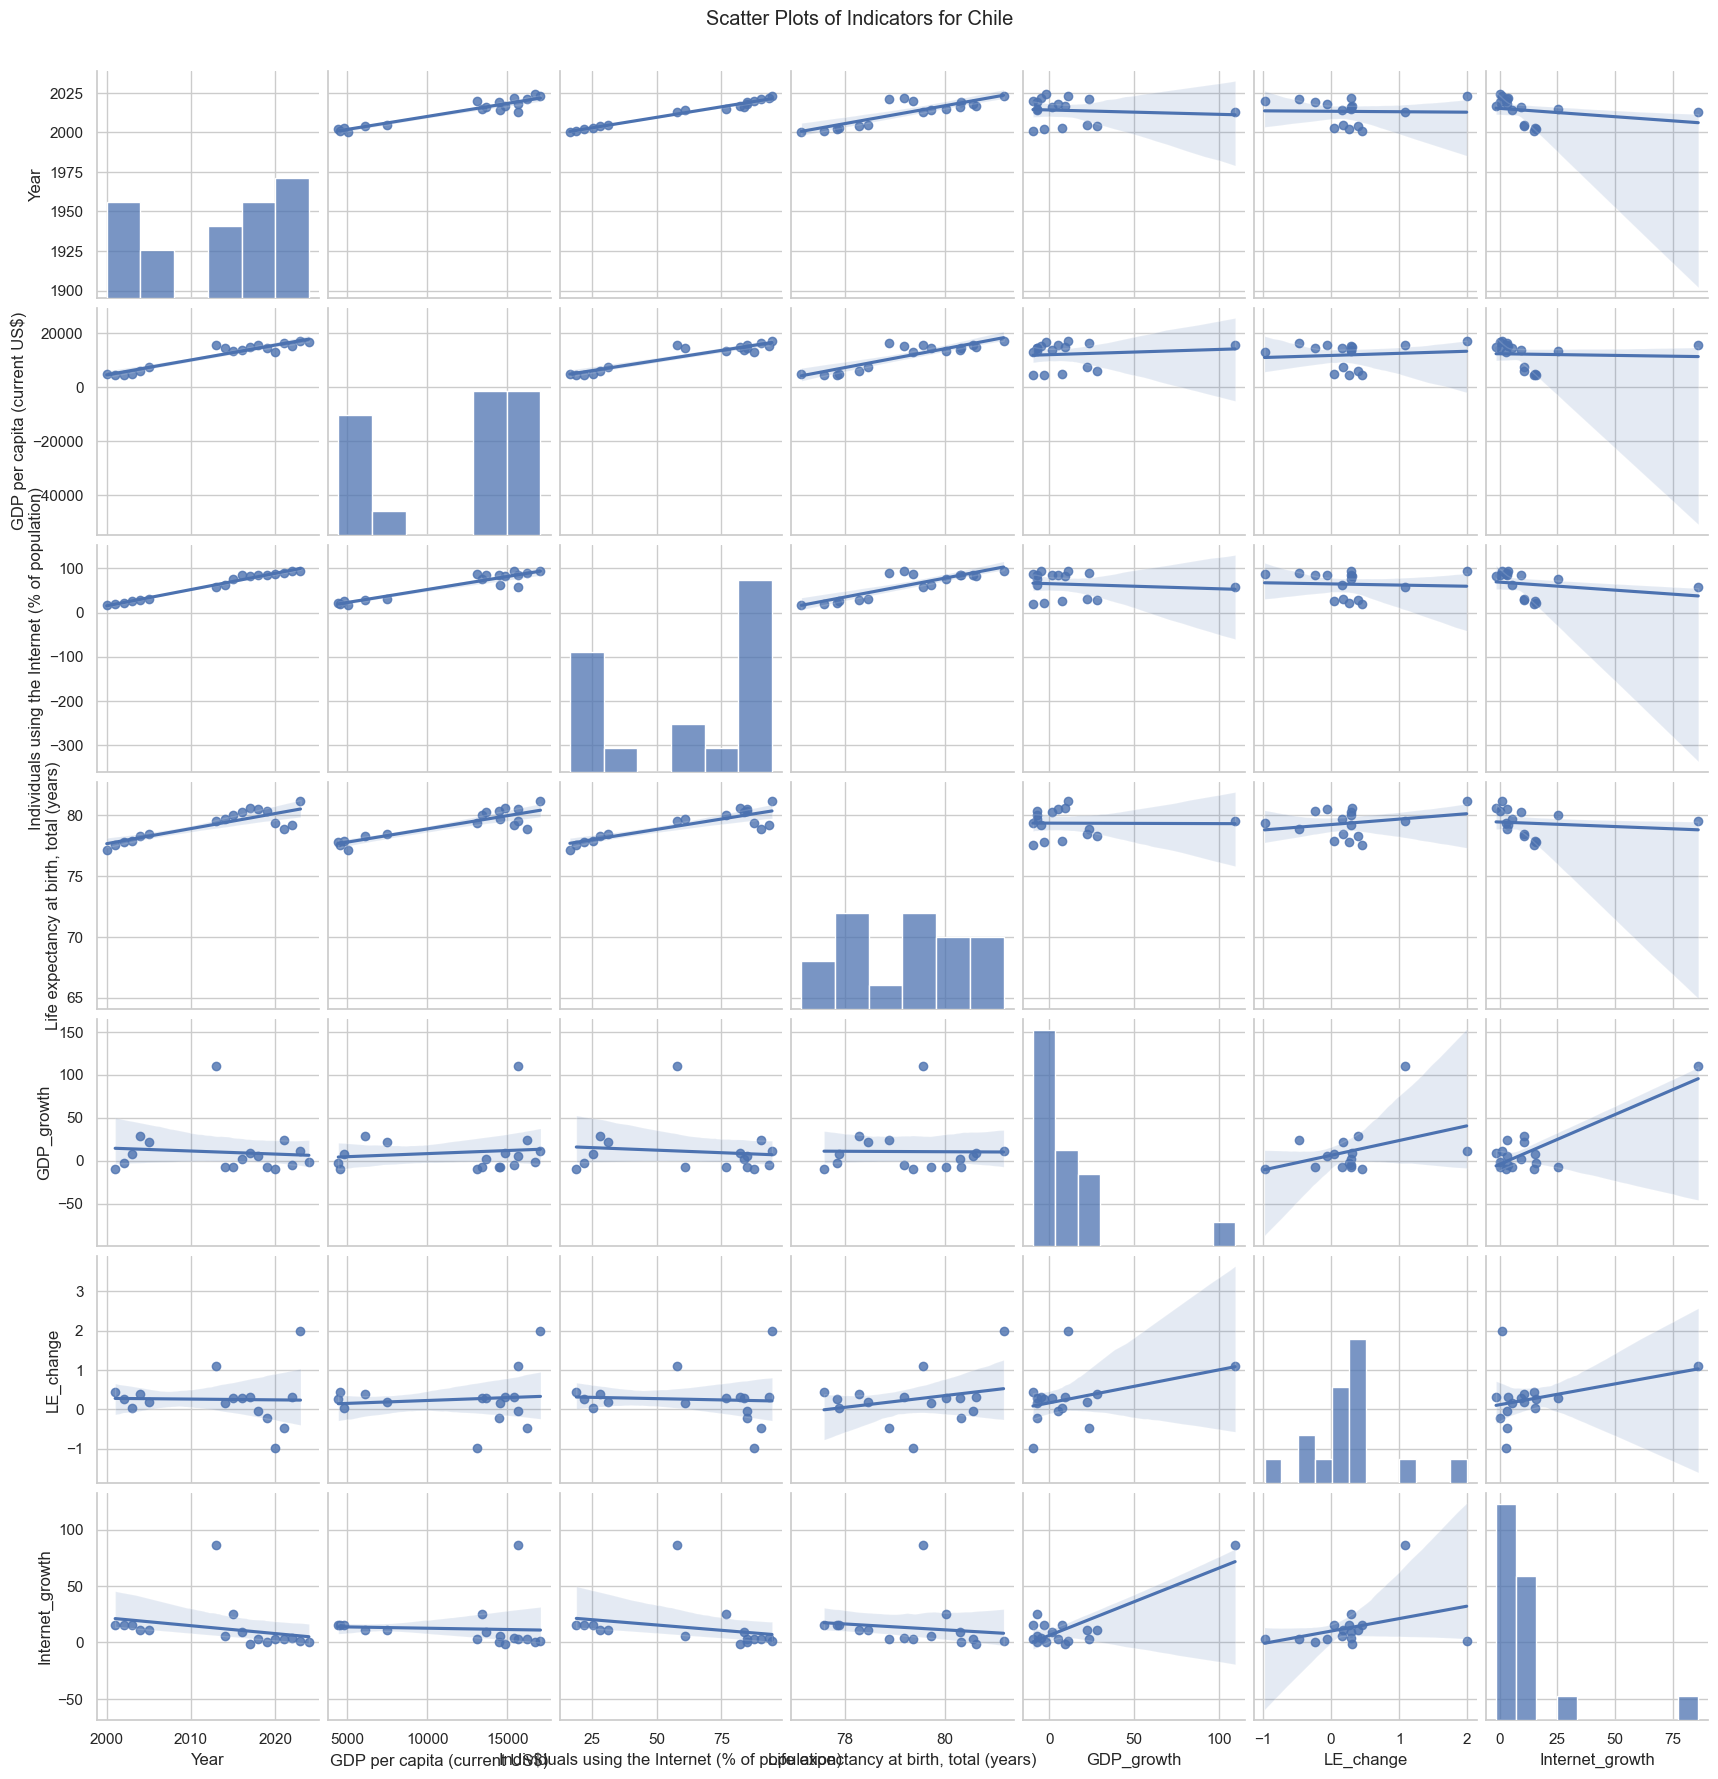

In [310]:
sns.pairplot(df_country, kind='reg')
plt.suptitle(f"Scatter Plots of Indicators for {country}", y=1.02)
plt.show()


## Global correlation

Global correlation (yearly averages):
                  GDP_growth  LE_change  Internet_growth
GDP_growth         1.000000   0.782817         0.952642
LE_change          0.782817   1.000000         0.781534
Internet_growth    0.952642   0.781534         1.000000


/Users/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/anaconda3/lib/python3.13/site-packages/numpy/_core/function_base.py:169: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/anaconda3/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1650: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/Users/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/anaconda3/lib/python3.13/site-packages/numpy/_core/function_base.py:169: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/anaconda3/lib/python3.13/site-packages/numpy/lib/

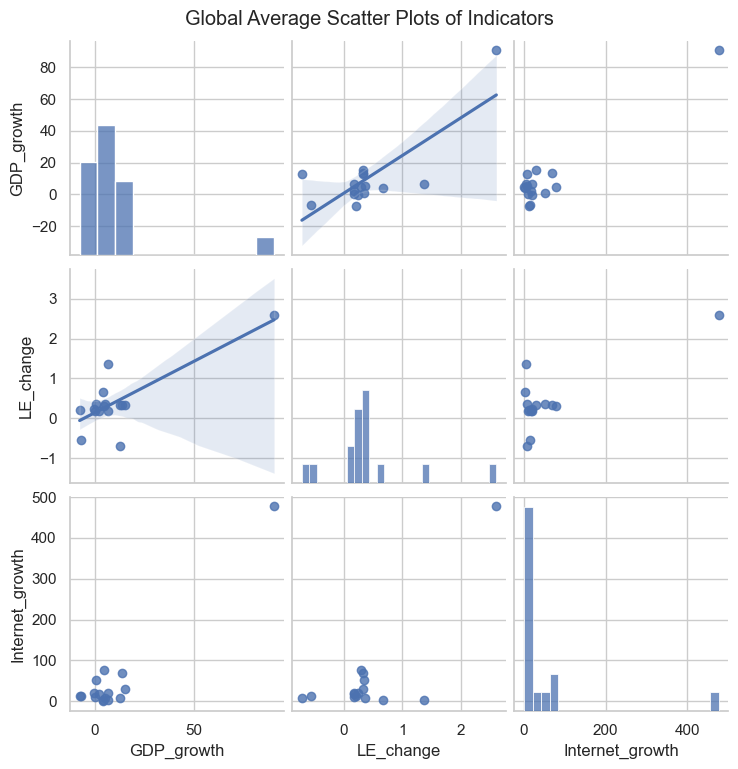

In [298]:
# Compute global correlation per year
df_global = df_wide.groupby('Year')[['GDP_growth', 'LE_change', 'Internet_growth']].mean()
global_corr = df_global.corr()
print("Global correlation (yearly averages):\n", global_corr)

# Scatter plot of global trends
sns.pairplot(df_global, kind='reg')
plt.suptitle("Global Average Scatter Plots of Indicators", y=1.02)
plt.show()


## interpretation:
GDP growth fluctuates year-to-year; countries like Chile show steadier growth, while Argentina and Brazil are more volatile.

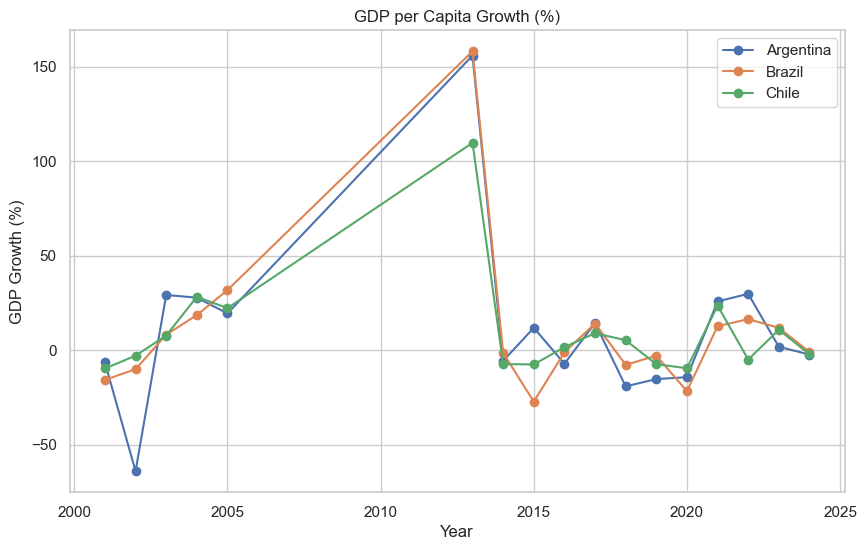

In [299]:
countries = ['Argentina', 'Brazil', 'Chile']

plt.figure(figsize=(10,6))
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country]
    plt.plot(df_country['Year'], df_country['GDP_growth'], marker='o', label=country)

plt.title('GDP per Capita Growth (%)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.legend()
plt.grid(True)
plt.show()


## Interpretation:
Life Expectancy increases gradually.
Correlation with GDP is moderate; economic growth supports gradual health improvements.

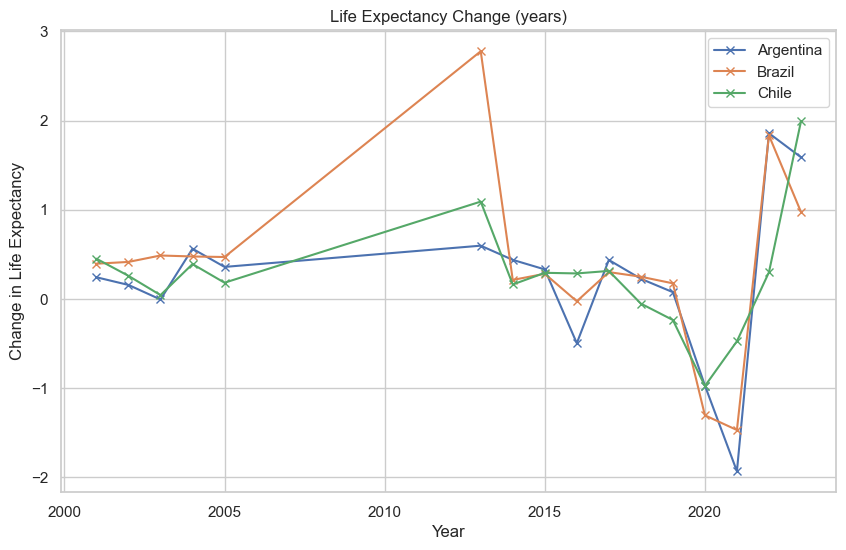

Argentina - Correlation GDP vs Life Expectancy Change: 0.15
Brazil - Correlation GDP vs Life Expectancy Change: 0.68
Chile - Correlation GDP vs Life Expectancy Change: 0.38


In [300]:
# Life Expectancy change
plt.figure(figsize=(10,6))
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country]
    plt.plot(df_country['Year'], df_country['LE_change'], marker='x', label=country)

plt.title('Life Expectancy Change (years)')
plt.xlabel('Year')
plt.ylabel('Change in Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

# Correlation with GDP
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country][['GDP_growth','LE_change']]
    corr = df_country.corr().iloc[0,1]
    print(f'{country} - Correlation GDP vs Life Expectancy Change: {corr:.2f}')



### How has Internet usage grown across countries and globally?

*** Interpretation:
*** Internet usage grows rapidly, especially in the last 10–15 years.
*** Global trend is smooth, reflecting worldwide technology adoption.


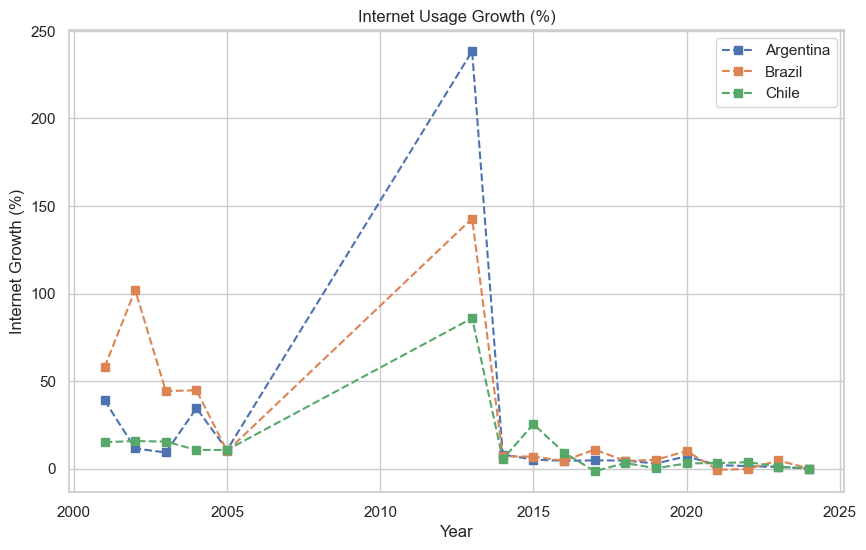

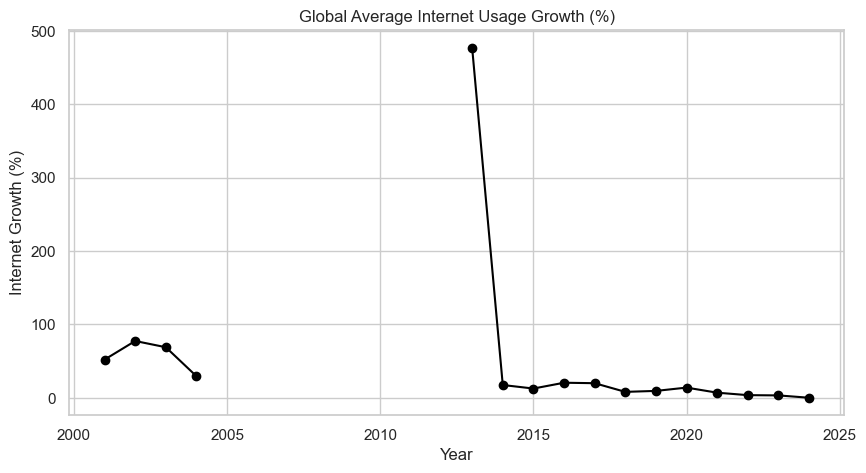

In [301]:
# Internet usage growth
plt.figure(figsize=(10,6))
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country]
    plt.plot(df_country['Year'], df_country['Internet_growth'], marker='s', linestyle='--', label=country)

plt.title('Internet Usage Growth (%)')
plt.xlabel('Year')
plt.ylabel('Internet Growth (%)')
plt.legend()
plt.grid(True)
plt.show()

# Global average
df_global = df_wide.groupby('Year')[['Internet_growth']].mean()
plt.figure(figsize=(10,5))
plt.plot(df_global.index, df_global['Internet_growth'], marker='o', color='black')
plt.title('Global Average Internet Usage Growth (%)')
plt.xlabel('Year')
plt.ylabel('Internet Growth (%)')
plt.grid(True)
plt.show()


## Are GDP growth, Life Expectancy change, and Internet adoption correlated?

Interpretation:
GDP ↔ Internet: strong positive correlation
GDP ↔ Life Expectancy: moderate positive correlation
Life Expectancy ↔ Internet: weak to moderate correlation

Correlation matrix for Argentina:
                  GDP_growth  LE_change  Internet_growth
GDP_growth         1.000000   0.153315         0.833037
LE_change          0.153315   1.000000         0.121425
Internet_growth    0.833037   0.121425         1.000000


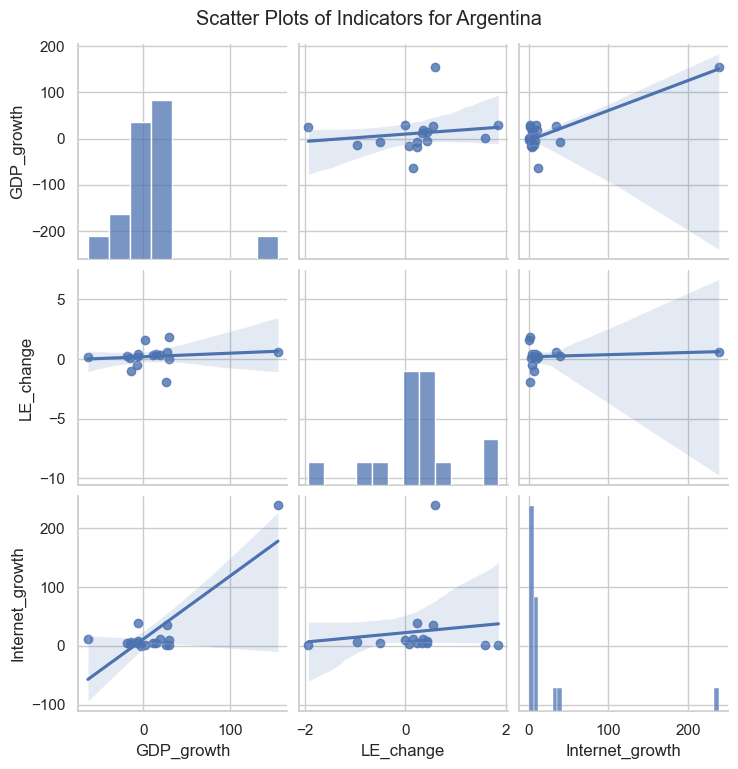

In [302]:
# Example for Argentina
df_country = df_wide[df_wide['Country Name'] == 'Argentina'][['GDP_growth','LE_change','Internet_growth']]

# Correlation matrix
corr_matrix = df_country.corr()
print("Correlation matrix for Argentina:\n", corr_matrix)

# Scatter plots
sns.pairplot(df_country, kind='reg')
plt.suptitle("Scatter Plots of Indicators for Argentina", y=1.02)
plt.show()


## How do countries compare in terms of development and technology adoption trends?

Interpretation:
Chile shows more stable GDP and health improvements.
Argentina and Brazil show larger GDP fluctuations but similar technology adoption trends.
Internet growth is rapid in all countries, highlighting global technological convergence.

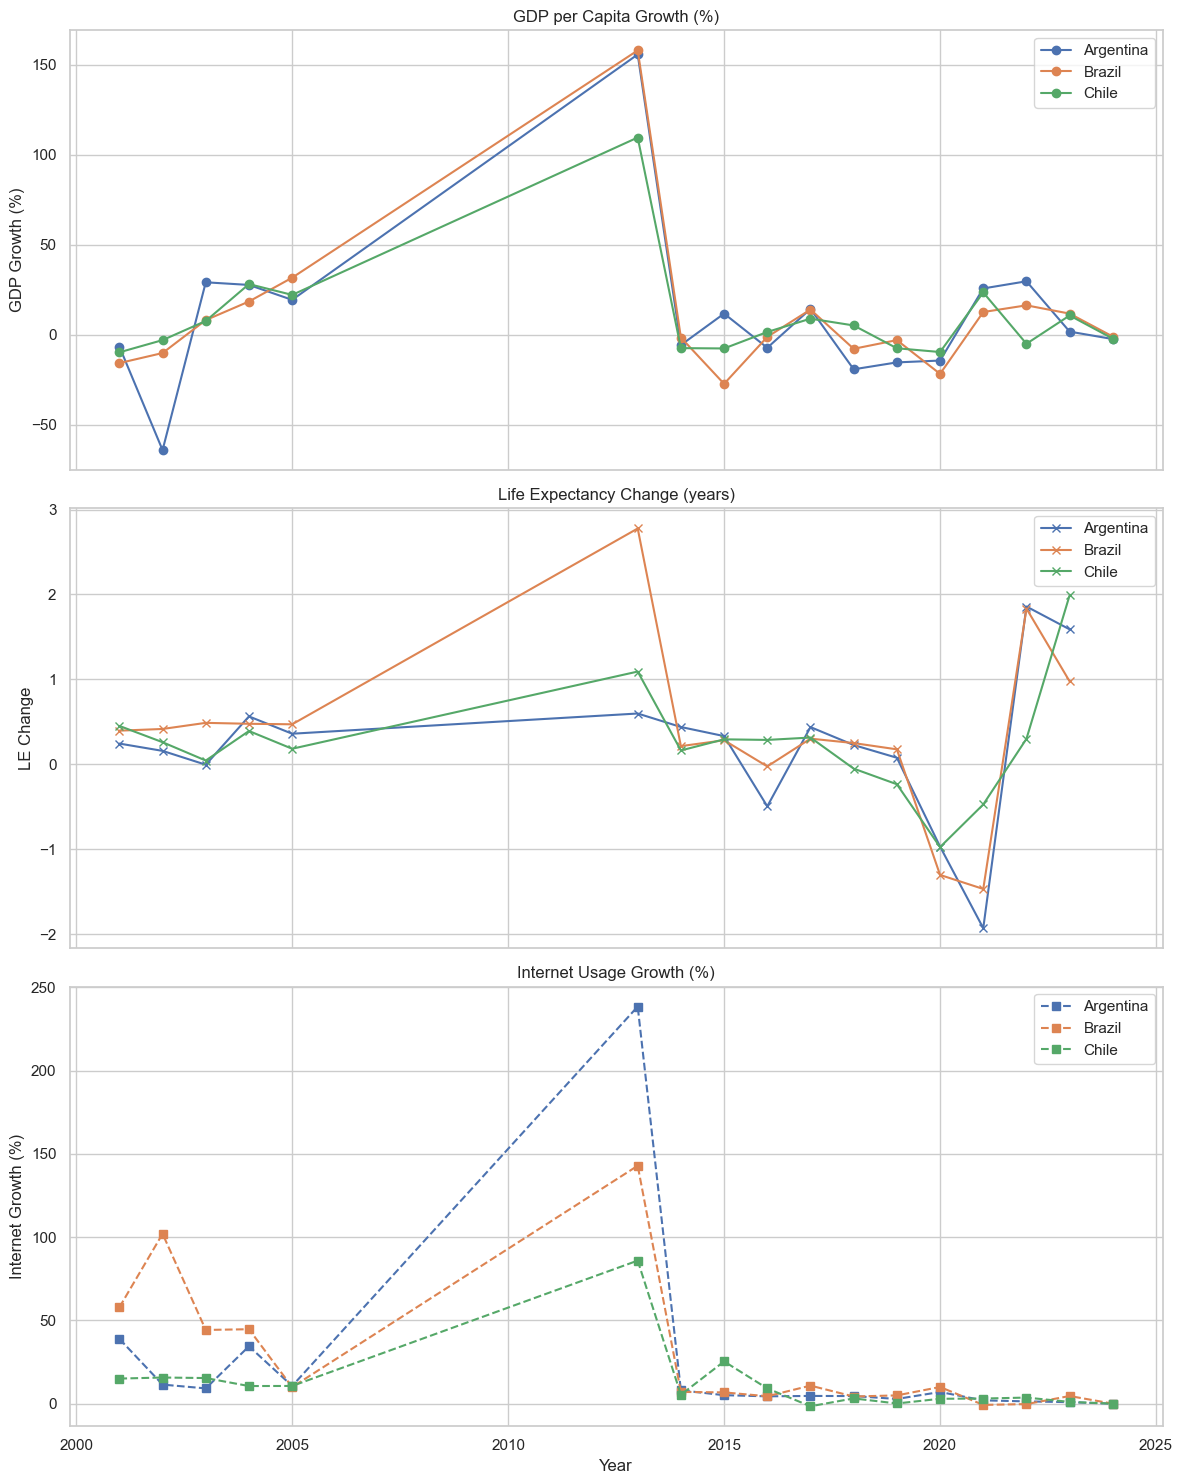

In [303]:
# Multi-country comparison
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# GDP growth
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country]
    axes[0].plot(df_country['Year'], df_country['GDP_growth'], marker='o', label=country)
axes[0].set_title('GDP per Capita Growth (%)')
axes[0].set_ylabel('GDP Growth (%)')
axes[0].legend()
axes[0].grid(True)

# Life Expectancy
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country]
    axes[1].plot(df_country['Year'], df_country['LE_change'], marker='x', label=country)
axes[1].set_title('Life Expectancy Change (years)')
axes[1].set_ylabel('LE Change')
axes[1].legend()
axes[1].grid(True)

# Internet usage
for country in countries:
    df_country = df_wide[df_wide['Country Name'] == country]
    axes[2].plot(df_country['Year'], df_country['Internet_growth'], marker='s', linestyle='--', label=country)
axes[2].set_title('Internet Usage Growth (%)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Internet Growth (%)')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()
